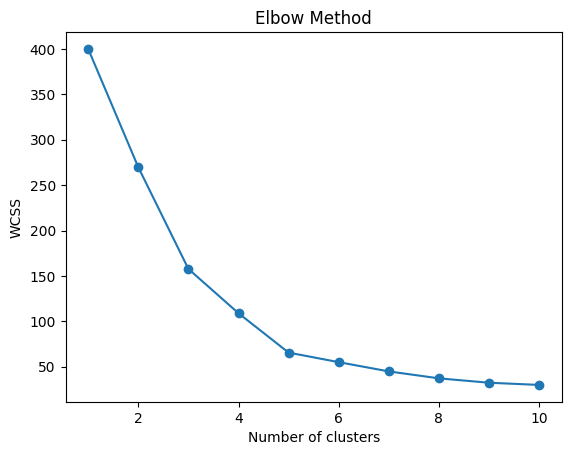

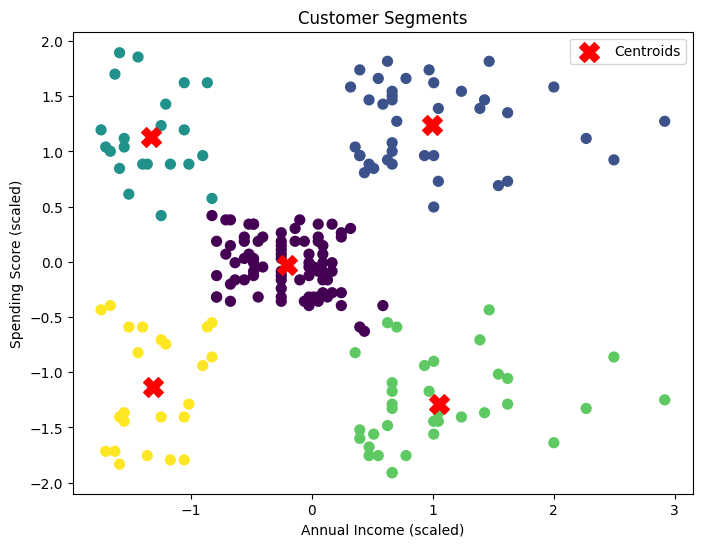

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


In [2]:
# K-Means Clustering on Mall Customer Dataset

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset (Mall_Customers.csv should be in the same directory)
data = pd.read_csv("Mall_Customers.csv")

# Select features for clustering
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]

# Standardize features (optional but helps in clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find the optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# Train KMeans with optimal cluster count (say k=5 from Elbow method)
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataset
data["Cluster"] = clusters

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap="viridis", s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c="red", marker="X", label="Centroids")
plt.title("Customer Segments")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()

# Show clustered dataset
print(data.head())